In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import median_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston

## load the boston dataset
boston = load_boston()
X, y = boston['data'], boston['target']







In [10]:
type(boston)

sklearn.utils.Bunch

In [13]:

boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [18]:
data =  pd.DataFrame(boston.data ,columns=boston.feature_names)
data.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [19]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


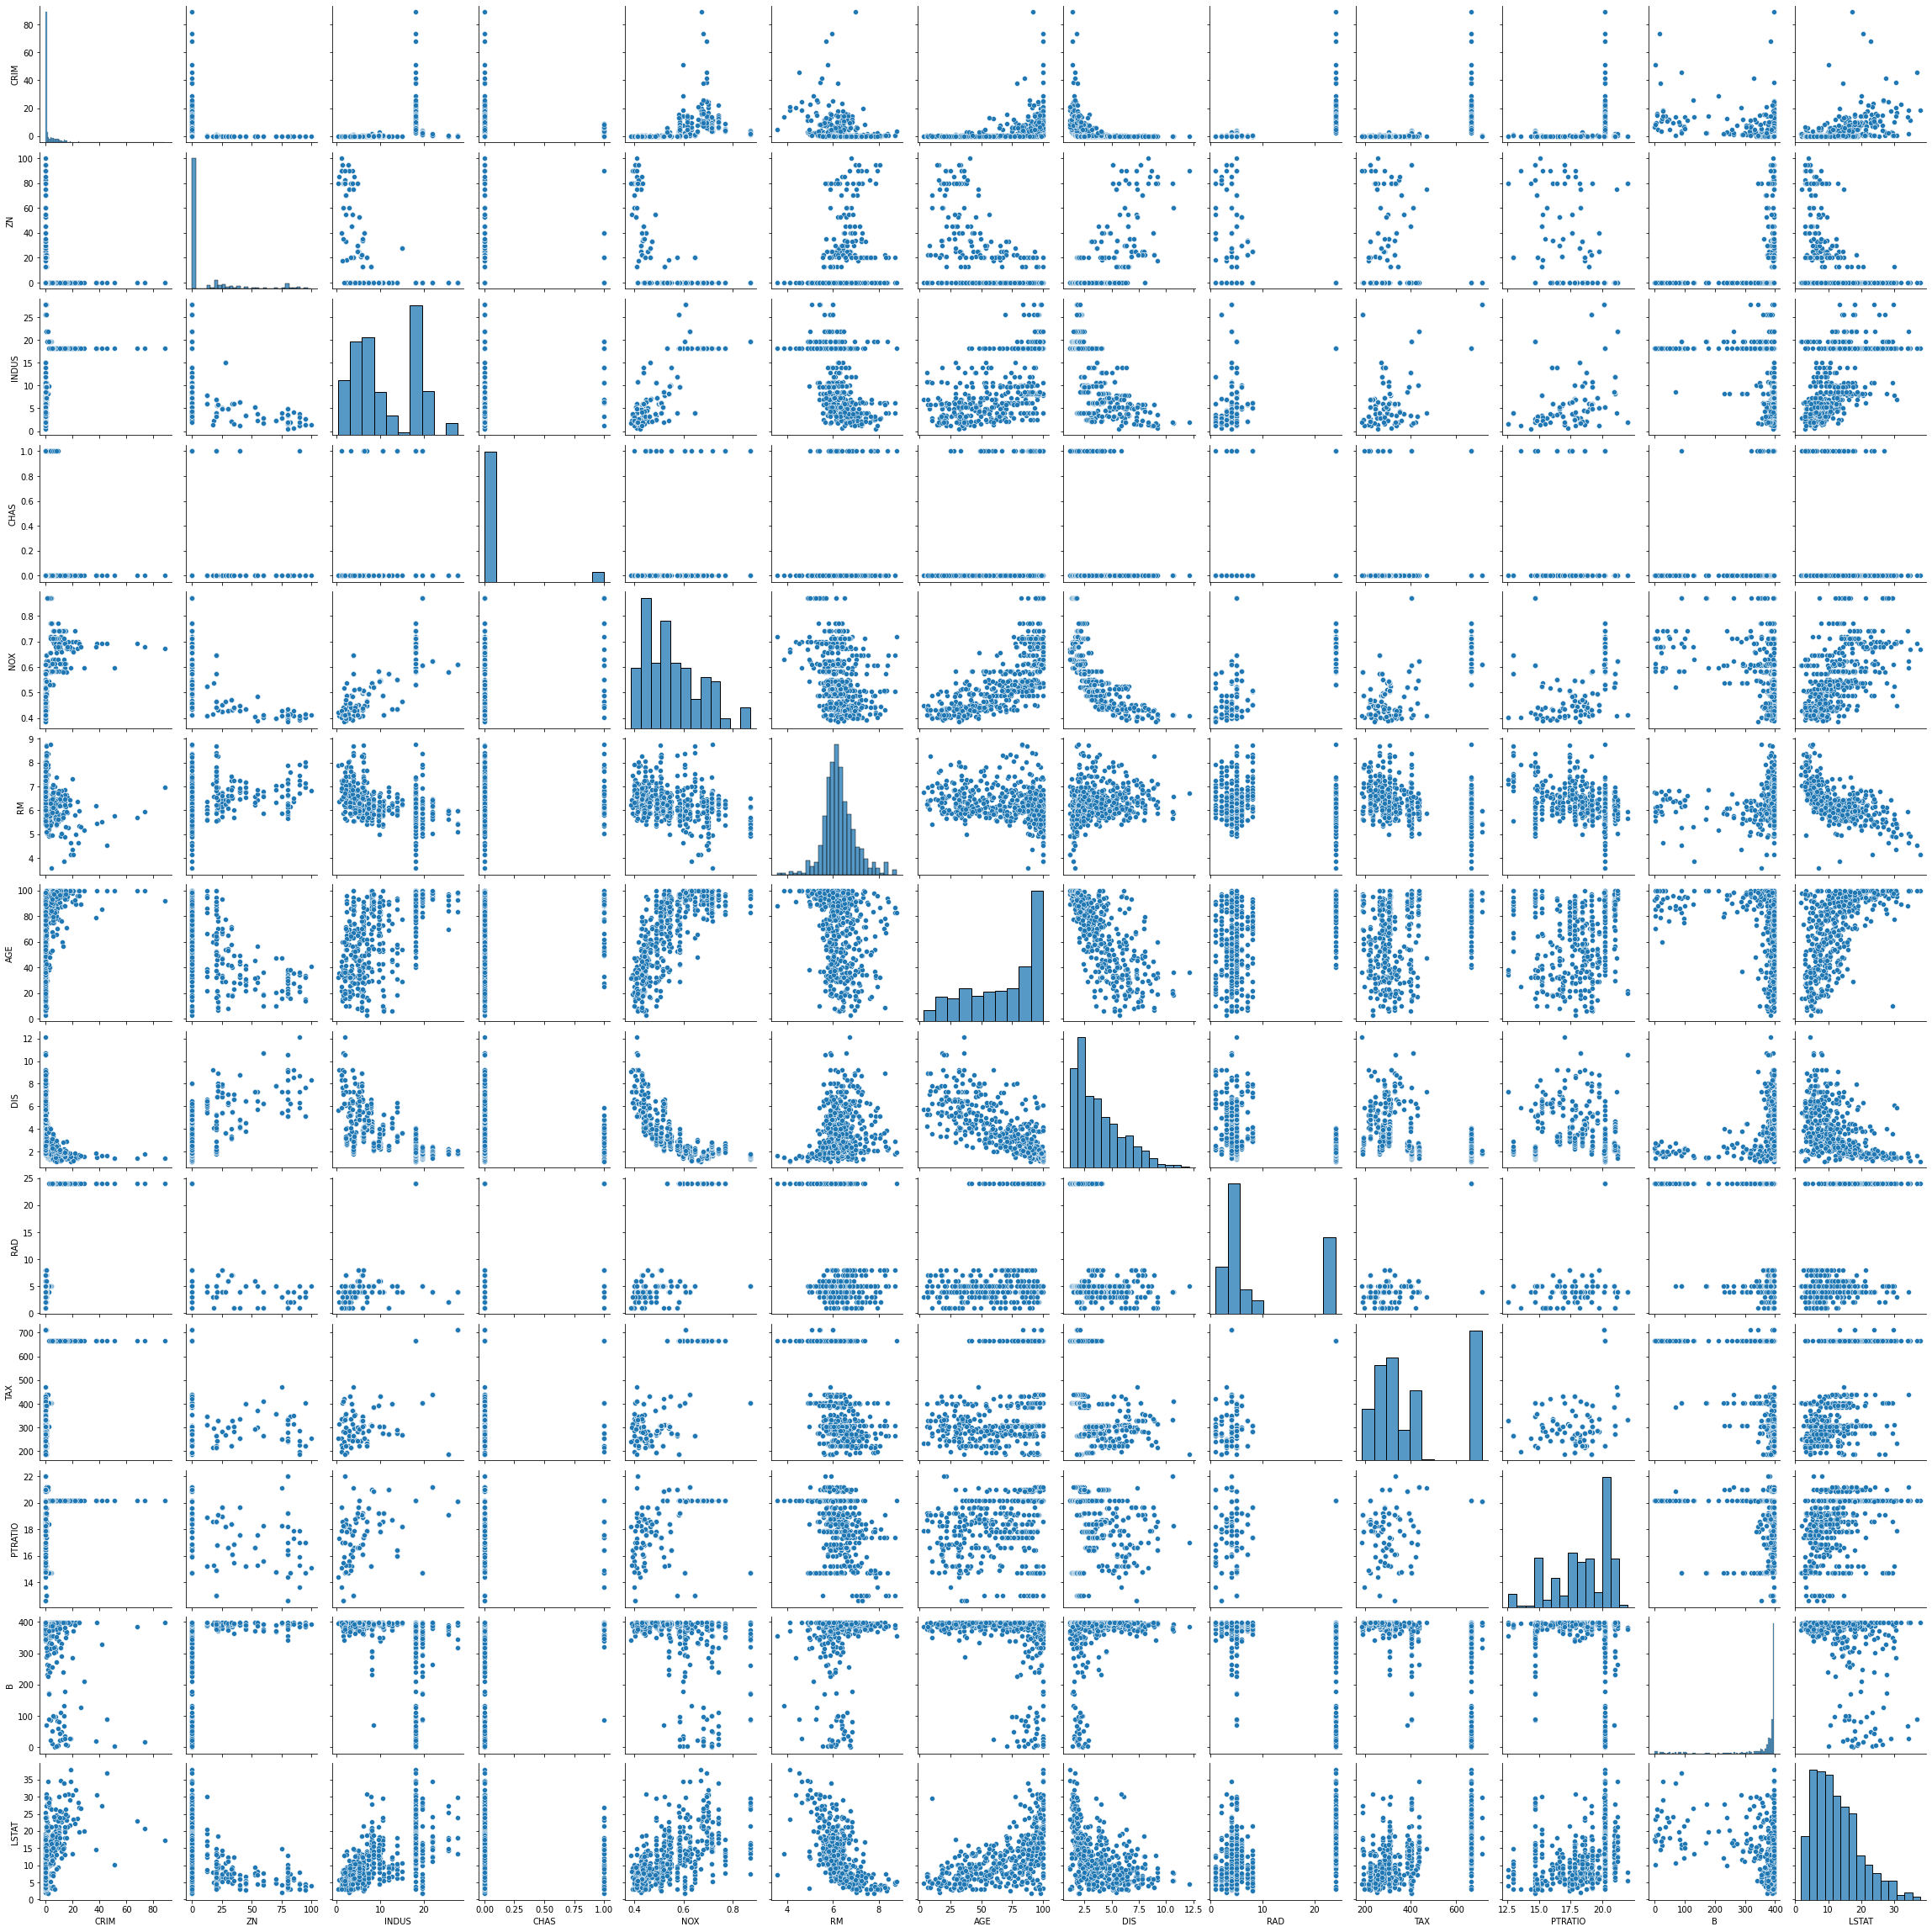

In [22]:
import seaborn as sns
sns.pairplot(data)

In [25]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [29]:
features = boston['feature_names'] 

## split the data to a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20 ,random_state=0)


In [30]:
## create a pipeline
pipe = Pipeline([("scaler", StandardScaler()),
                 ("featsel", SelectKBest(k=10)),
                 ("rf", RandomForestRegressor(n_estimators=20))])

In [31]:
## train on the training data
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('featsel',
                 SelectKBest(k=10,
                             score_func=<function f_classif at 0x7f1ad8aaf400>)),
                ('rf',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=20, n_jobs=None,
                                       oob_score=False, random_state=None,
    

In [32]:
## evaluate the model with the test data
y_pred = pipe.predict(X_test)
print(r'R^2=%.2f, MAE=%.2f'%(r2_score(y_test, y_pred), median_absolute_error(y_test, y_pred))) 

R^2=0.68, MAE=1.57
